# WEATHER PREDICTION
### Problem Definition
1) multiclass

2) By observing the features we have to predict Weather condition
### Data
Got this Dataset from kaggle: https://www.kaggle.com/datasets/ananthr1/weather-prediction
### Evaluation
1) accuracy

2) confusion matrix

3) classification report (precision , recall , f1_score)

4) roc _ curve
### Feature

* date
* precipitation
* temp_max
* temp_min
* wind


In [173]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
from imblearn.over_sampling import SMOTE

In [174]:
#import Dataset
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [176]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [177]:
len(df)

1461

In [178]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Some visualization

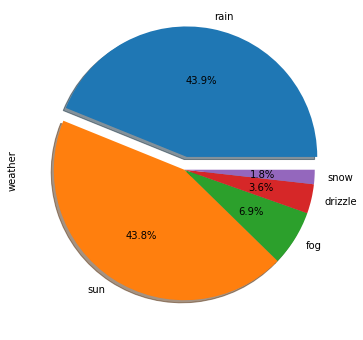

In [179]:
plt.figure(figsize=(10,6))
df['weather'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0,0,0,0],shadow=True);

**Set has 5 classes with some between them imbalancement, this can affect our model's predictions. As both recall and precision
are surely affected**

In [180]:
#lets make date column useful
year=[]
month=[]
day=[]
for data in df['date']:
    year.append( int(data.split('-')[0]))
    month.append(int(data.split('-')[1]))
    day.append(int(data.split('-')[2]))

In [181]:
df['year']=year
df['month']=month
df['day']=day

In [182]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [183]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun,2015,12,31


In [184]:
# no need of date column
df.drop('date',axis=1,inplace=True)

In [185]:
whether_month=pd.crosstab(df['weather'],df['month'])
whether_month

month,1,2,3,4,5,6,7,8,9,10,11,12
weather,,,,,,,,,,,,
drizzle,10,4,3,3,1,2,8,8,5,4,3,2
fog,17,3,6,3,5,1,10,6,14,19,9,8
rain,61,75,73,61,40,42,16,24,36,62,75,76
snow,8,4,6,1,0,0,0,0,0,0,1,6
sun,28,27,36,52,78,75,90,86,65,39,32,32


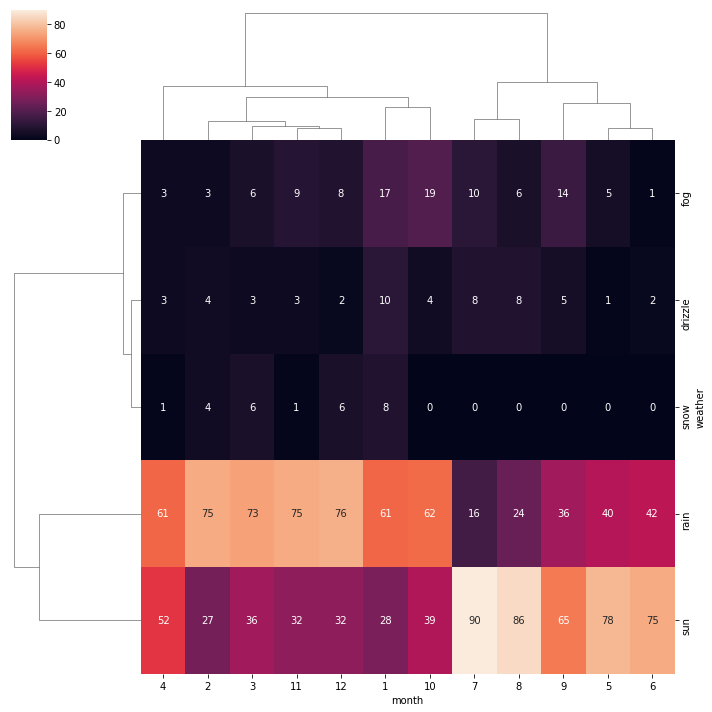

In [186]:
sns.clustermap(whether_month,annot=True);

In [187]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


### Outfitters w.r.t precipitation and wind

In [188]:
def outfitters (x):
    sets=[]
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    inter=q3-q1
    sets.append(q1 - (1.5*inter))
    sets.append(q3 - (1.5*inter))
    return sets

In [189]:
#precipitation
ranges=outfitters(df['precipitation'])
ranges[0],ranges[1]

(-4.199999999999999, -1.3999999999999995)

In [190]:
len(df[(df['precipitation']<-4.199999999999999) | (df['precipitation']>-1.3999999999999995)])

1461

**No outfitter w.r.t precipitation**

In [191]:
#precipitation
ranges=outfitters(df['wind'])
ranges[0],ranges[1]

(-0.49999999999999956, 1.3000000000000003)

In [192]:
len(df[(df['wind']<-0.49999999999999956) | (df['wind']>1.3000000000000003)])

1374

In [193]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   year           1461 non-null   int64  
 6   month          1461 non-null   int64  
 7   day            1461 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 91.4+ KB


In [195]:
df=df.sample(len(df)).reset_index()

In [196]:
df.head()

,index,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,892,0.0,23.9,11.1,2.7,sun,2014,6,11
1,1106,1.5,9.4,7.2,1.1,rain,2015,1,11
2,413,0.0,9.4,4.4,3.4,rain,2013,2,17
3,522,0.0,26.7,12.2,2.5,sun,2013,6,6
4,1036,1.8,13.3,7.2,2.9,rain,2014,11,2


In [197]:
df.drop('index',axis=1,inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,23.9,11.1,2.7,sun,2014,6,11
1,1.5,9.4,7.2,1.1,rain,2015,1,11
2,0.0,9.4,4.4,3.4,rain,2013,2,17
3,0.0,26.7,12.2,2.5,sun,2013,6,6
4,1.8,13.3,7.2,2.9,rain,2014,11,2


### move for modelling and splitting

In [198]:
x=df.drop('weather',axis=1)
y=df['weather']

In [199]:
smote=SMOTE(sampling_strategy='all')
x_sm,y_sm=smote.fit_resample(x,y)

In [200]:
y.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [201]:
y_sm.value_counts()

sun        641
rain       641
fog        641
snow       641
drizzle    641
Name: weather, dtype: int64

In [202]:
x_sm.head()

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,23.9,11.1,2.7,2014,6,11
1,1.5,9.4,7.2,1.1,2015,1,11
2,0.0,9.4,4.4,3.4,2013,2,17
3,0.0,26.7,12.2,2.5,2013,6,6
4,1.8,13.3,7.2,2.9,2014,11,2


In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [204]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def evaluate(y_test,y_pred):
    print('Accuracy : ',accuracy_score(y_test,y_pred))
    print('Classification report ::: \n',classification_report(y_test,y_pred))
    print('Confusion Matrix : \n\n')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='g')
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [205]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

Accuracy :  0.8600682593856656
Classification report ::: 
               precision    recall  f1-score   support

     drizzle       0.50      0.09      0.15        11
         fog       0.80      0.18      0.30        22
        rain       0.96      0.95      0.95       130
        snow       0.50      0.50      0.50         4
         sun       0.79      0.97      0.87       126

    accuracy                           0.86       293
   macro avg       0.71      0.54      0.56       293
weighted avg       0.85      0.86      0.83       293

Confusion Matrix : 




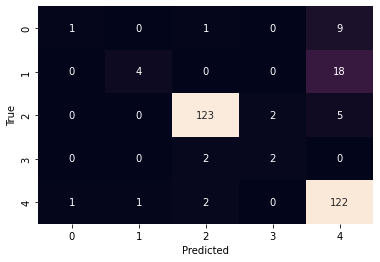

In [206]:
np.random.seed(42)
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
evaluate(y_test,r_model.predict(x_test))

**As it can be observed that we have got a excellent accuracy but a very bad result in the scene of f1-score,recall,precision lets try this with x_sm,y_sm**

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

Accuracy :  0.9095163806552262
Classification report ::: 
               precision    recall  f1-score   support

     drizzle       0.92      0.95      0.93       128
         fog       0.86      0.92      0.89       129
        rain       0.97      0.92      0.94       128
        snow       0.98      0.98      0.98       128
         sun       0.83      0.77      0.80       128

    accuracy                           0.91       641
   macro avg       0.91      0.91      0.91       641
weighted avg       0.91      0.91      0.91       641

Confusion Matrix : 




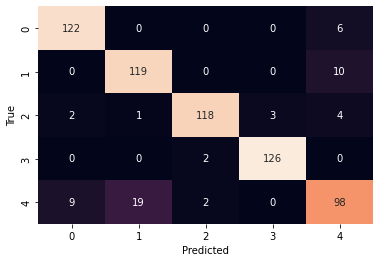

In [208]:
#RandomForestClassifier
np.random.seed(42)
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
evaluate(y_test,r_model.predict(x_test))

**Such a great result we have got lets try this with other models**

Accuracy :  0.8627145085803433
Classification report ::: 
               precision    recall  f1-score   support

     drizzle       0.84      0.94      0.89       128
         fog       0.80      0.80      0.80       129
        rain       0.95      0.91      0.93       128
        snow       0.97      0.98      0.97       128
         sun       0.75      0.69      0.72       128

    accuracy                           0.86       641
   macro avg       0.86      0.86      0.86       641
weighted avg       0.86      0.86      0.86       641

Confusion Matrix : 




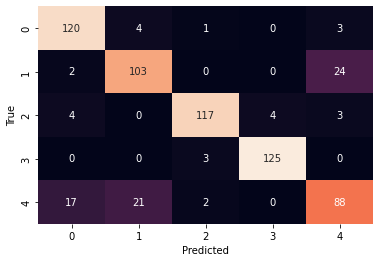

In [209]:
#GradientBoostingClassifier
np.random.seed(42)
g_model=GradientBoostingClassifier()
g_model.fit(x_train,y_train)
evaluate(y_test,g_model.predict(x_test))

Accuracy :  0.8377535101404057
Classification report ::: 
               precision    recall  f1-score   support

     drizzle       0.87      0.84      0.85       128
         fog       0.79      0.81      0.80       129
        rain       0.88      0.91      0.89       128
        snow       0.96      0.94      0.95       128
         sun       0.70      0.70      0.70       128

    accuracy                           0.84       641
   macro avg       0.84      0.84      0.84       641
weighted avg       0.84      0.84      0.84       641

Confusion Matrix : 




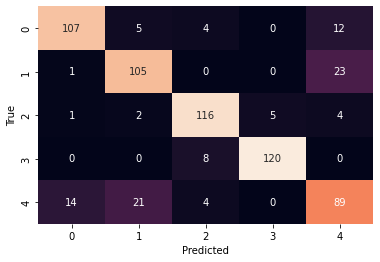

In [210]:
#DecisionTreeClassifier()
np.random.seed(42)
d_model=DecisionTreeClassifier()
d_model.fit(x_train,y_train)
evaluate(y_test,d_model.predict(x_test))

**We will move with RandomForestClassifier**

In [223]:
importance=r_model.feature_importances_

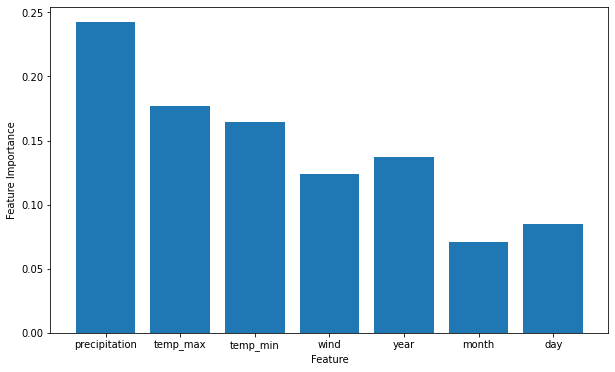

In [230]:
plt.figure(figsize=(10,6))
plt.bar(x=x.columns,height=importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importance');

In [218]:
#Lets Create simple interface
df_pred=pd.DataFrame(columns=x.columns)

In [222]:
for col in x.columns:
    print(col," : ")
    take=float(input())
    df_pred.at[0,col]=take    
print('Predicted Weather : ',r_model.predict(df_pred))

precipitation  : 
0.0
temp_max  : 
12.8
temp_min  : 
5.0
wind  : 
4.7
year  : 
2012
month  : 
1
day  : 
1
Predicted Weather :  ['drizzle']
